In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from scipy.sparse.linalg import svds
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MultiLabelBinarizer

In [50]:
movies = pd.read_csv('movie_details.csv')

In [51]:
movies.head()

,ID,Title,Year,Rating,Directors,Actors,Type,Genres,Countries,Duration,Description
0,0094675,Ariel,1988.0,7.5,Aki Kaurismäki,"Turo Pajala, Susanna Haavisto, Matti Pellonpää...",movie,"Comedy, Crime, Romance",Finland,72.0,"The movie tells the story of Taisto Kasurinen,..."
1,0092149,Shadows in Paradise,1986.0,7.5,Aki Kaurismäki,"Matti Pellonpää, Kati Outinen, Sakari Kuosmane...",movie,"Comedy, Drama, Music, Romance",Finland,74.0,"Only connect. In gray, class-conscious Helsink..."
2,0113101,Four Rooms,1995.0,6.7,"Allison Anders, Alexandre Rockwell, Robert Rod...","Sammi Davis, Amanda De Cadenet, Valeria Golino...",movie,Comedy,United States,98.0,This movie features the collaborative director...
3,0107286,Judgment Night,1993.0,6.6,Stephen Hopkins,"Emilio Estevez, Cuba Gooding Jr., Denis Leary,...",movie,"Action, Crime, Drama, Thriller","Japan, United States",110.0,"Four pals are on their way to a boxing match, ..."
4,0825671,Life in Loops (A Megacities RMX),2006.0,8.1,Timo Novotny,NaN,movie,Documentary,Austria,79.0,Timo Novotny labels his new project an experim...


In [52]:
movies.isna().sum()

ID                0
Title             0
Year            149
Rating          965
Directors      1098
Actors          360
Type            131
Genres          253
Countries       237
Duration       9521
Description    2856
dtype: int64

In [53]:
movies['Description'].fillna('', inplace=True)

C:\Users\ABHINAV\AppData\Local\Temp\ipykernel_22244\1695166378.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies['Description'].fillna('', inplace=True)


In [54]:
movies['Genres'].fillna('', inplace= True)

C:\Users\ABHINAV\AppData\Local\Temp\ipykernel_22244\1868096582.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies['Genres'].fillna('', inplace= True)


In [55]:
movies['Title'].duplicated().sum()

0

In [56]:

movies.drop_duplicates(subset=['Title'], inplace=True)

In [57]:
movies['Title'].duplicated().sum()

0

In [58]:

min_rating = movies['Rating'].min()
max_rating = movies['Rating'].max()
movies['metascore'] = ((movies['Rating'] - min_rating) / (max_rating - min_rating)) * 100
movies['metascore'] = movies['metascore'].round(1)


In [59]:
movies

,ID,Title,Year,Rating,Directors,Actors,Type,Genres,Countries,Duration,Description,metascore
0,0094675,Ariel,1988.0,7.5,Aki Kaurismäki,"Turo Pajala, Susanna Haavisto, Matti Pellonpää...",movie,"Comedy, Crime, Romance",Finland,72.0,"The movie tells the story of Taisto Kasurinen,...",71.6
1,0092149,Shadows in Paradise,1986.0,7.5,Aki Kaurismäki,"Matti Pellonpää, Kati Outinen, Sakari Kuosmane...",movie,"Comedy, Drama, Music, Romance",Finland,74.0,"Only connect. In gray, class-conscious Helsink...",71.6
2,0113101,Four Rooms,1995.0,6.7,"Allison Anders, Alexandre Rockwell, Robert Rod...","Sammi Davis, Amanda De Cadenet, Valeria Golino...",movie,Comedy,United States,98.0,This movie features the collaborative director...,62.5
3,0107286,Judgment Night,1993.0,6.6,Stephen Hopkins,"Emilio Estevez, Cuba Gooding Jr., Denis Leary,...",movie,"Action, Crime, Drama, Thriller","Japan, United States",110.0,"Four pals are on their way to a boxing match, ...",61.4
4,0825671,Life in Loops (A Megacities RMX),2006.0,8.1,Timo Novotny,NaN,movie,Documentary,Austria,79.0,Timo Novotny labels his new project an experim...,78.4
...,...,...,...,...,...,...,...,...,...,...,...,...
10589,0040725,The Red Shoes,1948.0,8.1,"Michael Powell, Emeric Pressburger","Anton Walbrook, Marius Goring, Moira Shearer, ...",movie,"Drama, Music, Romance",United Kingdom,NaN,Under the authoritarian rule of charismatic ba...,78.4
10590,14170016,One Ordinary Day,2021.0,8.1,NaN,"Kim Soo-hyun, Cha Seung-won, Lee Hyeon-geol, K...",tv series,"Crime, Mystery",South Korea,NaN,,78.4
10591,5022702,Hush,2016.0,6.6,Mike Flanagan,"John Gallagher Jr., Kate Siegel, Michael Trucc...",movie,"Horror, Thriller",United States,NaN,"Maddie Young, a deaf-mute horror author, has d...",61.4
10592,8801708,Beauty Inside,2018.0,7.6,NaN,"Seo Hyeon-jin, Lee Min-ki, Lee Da-hee, Ahn Jae...",tv series,"Drama, Fantasy, Romance",South Korea,NaN,A woman changes her appearance whenever a cert...,72.7


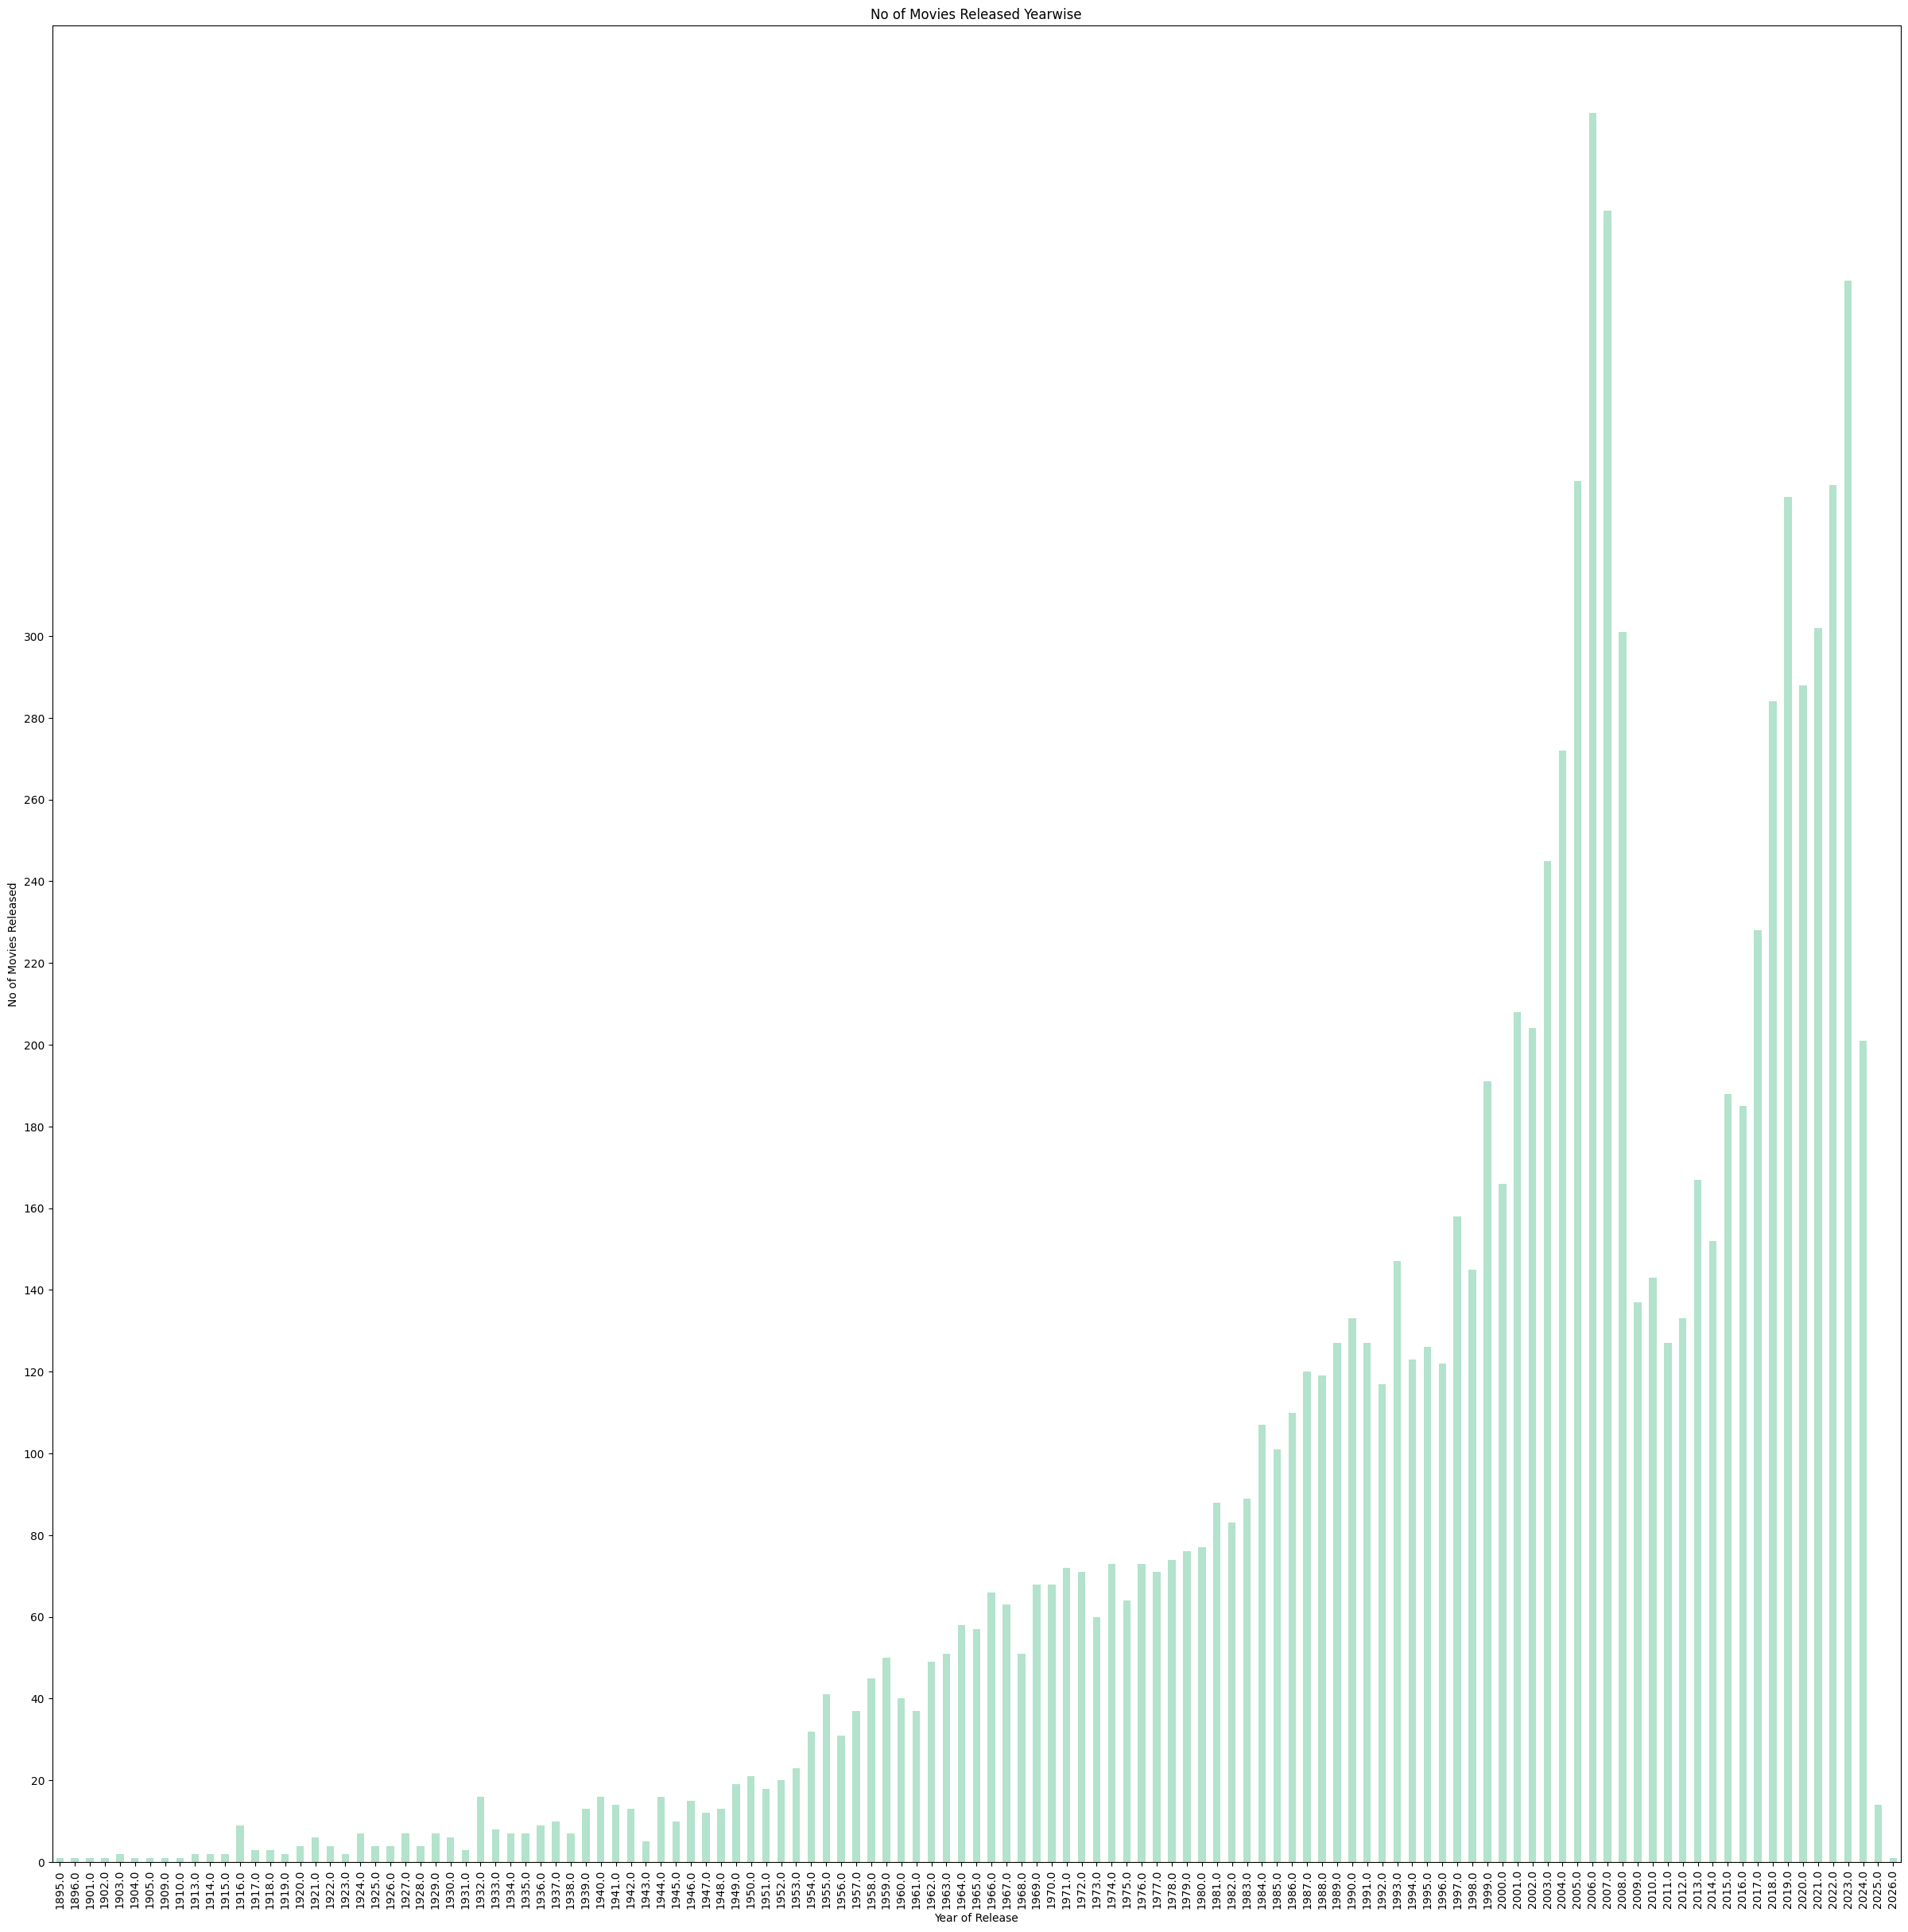

In [60]:

movies.groupby('Year').count()['Title'].plot(kind='bar', figsize=(30,30), yticks=np.linspace(0,300,16), cmap='Pastel2')
plt.xlabel('Year of Release')
plt.ylabel('No of Movies Released')
plt.title('No of Movies Released Yearwise')


plt.xticks(rotation= 'vertical')

plt.show()

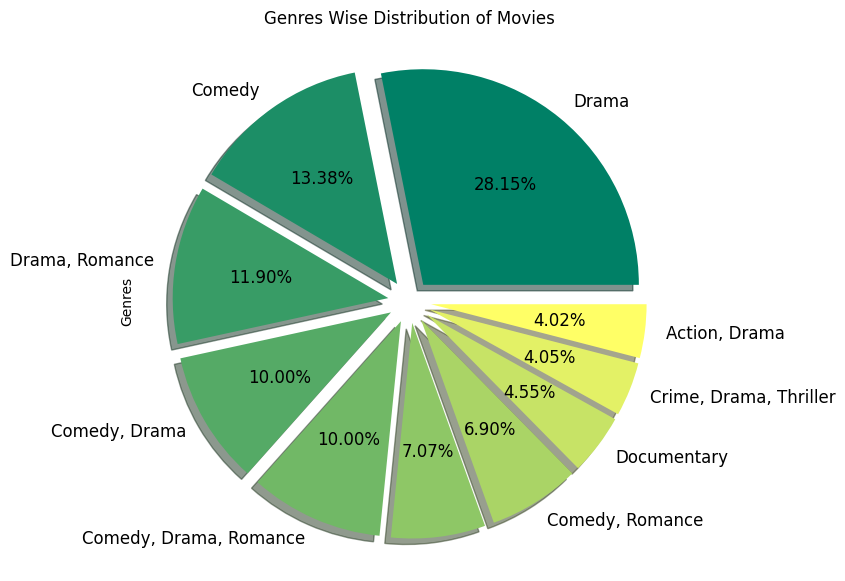

In [61]:
movies['Genres'].value_counts()[:10].plot(kind='pie',explode=np.full(10,0.1),fontsize=12,autopct='%3.2f%%',shadow=True,cmap='summer',figsize=(10,7))
plt.title('Genres Wise Distribution of Movies')
plt.ylabel('Genres')
plt.show()

Text(0.5, 1.0, 'Movies To Watch according to Genress')

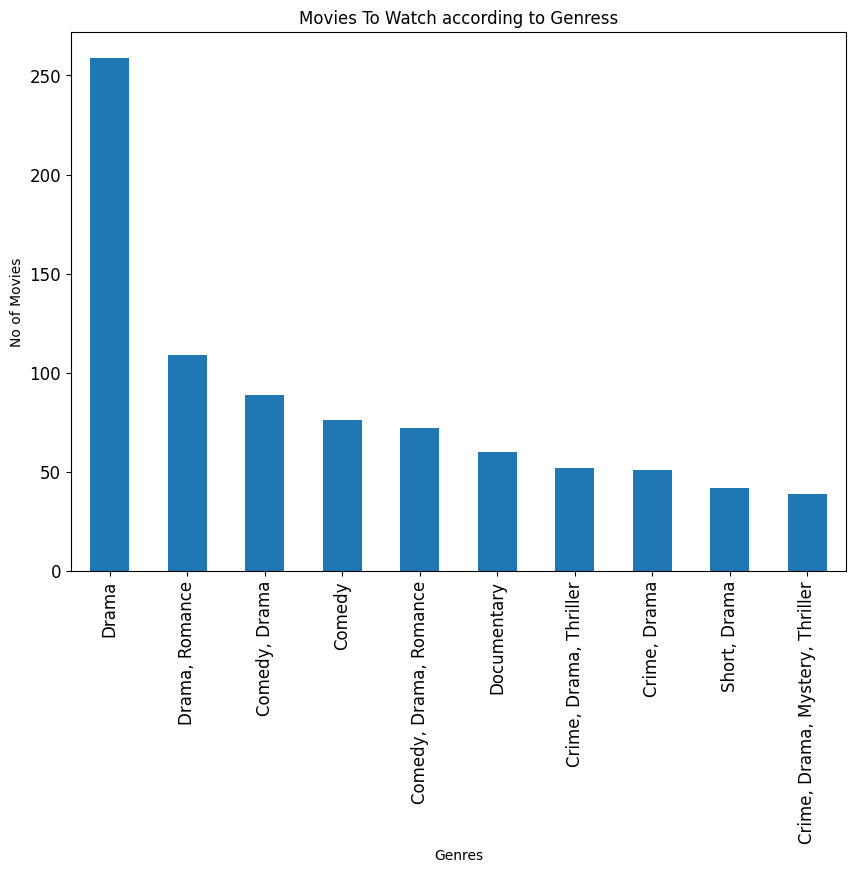

In [62]:
desirable = movies[movies['metascore'] > 70].sort_values(by=['metascore'],ascending=False)
desirable['Genres'].value_counts()[:10].plot(kind='bar',figsize=(10,7),fontsize=12)
plt.xlabel('Genres')
plt.ylabel('No of Movies')
plt.title("Movies To Watch according to Genress")

Text(0.5, 1.0, 'Duration of Most Liked Movies')

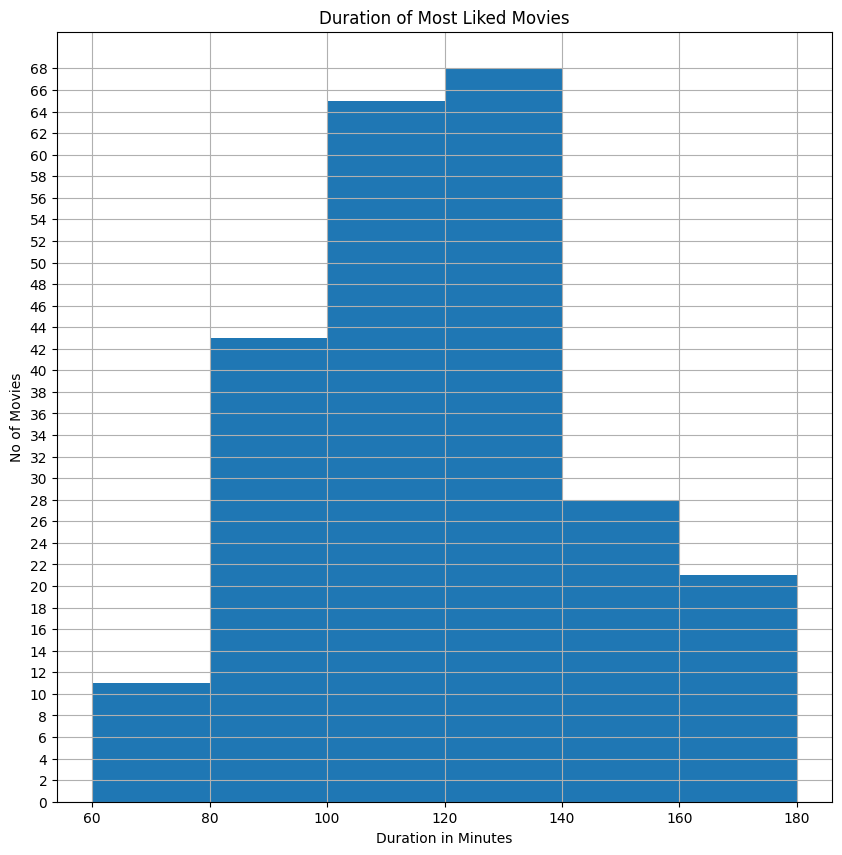

In [63]:
bins=[60,80,100,120,140,160,180]
movies[(movies['Rating'] > 7.5) & (movies['metascore'] > 75)]['Duration'].plot(kind='hist',grid=True,bins=bins,xticks=bins,yticks=np.arange(0,70,2),figsize=(10,10))
plt.xlabel('Duration in Minutes')
plt.ylabel('No of Movies')
plt.title('Duration of Most Liked Movies')

In [64]:

Movie_title = input("Enter Movie Name: ")

movie_title = movies[movies['Title'].str.contains(Movie_title, na=False)]

sorted_movie_title = movie_title.sort_values(by='metascore', ascending=False)
print(sorted_movie_title[['Title', 'Year', 'metascore']])



                                          Title    Year  metascore
8137                   Boro Bhaiyya Chole Geche  2021.0      100.0
9013                                 Najma Park  2024.0       97.7
10201  Criminal Minds Season 5: Fear the Reaper  2010.0       97.7
9392                                      Gajra  2022.0       96.6
9373                            Bol Diyaan Unma  2021.0       96.6
...                                         ...     ...        ...
10544                          Young Doctor Sam  1949.0        NaN
10546   The Tale of Nokdu VS Extra-ordinary You  2019.0        NaN
10570       LeAnn Rimes: The Light in Your Eyes  1997.0        NaN
10582            Love Life & Screw Ups Season 2     NaN        NaN
10587                           One Twenty-Five  2002.0        NaN

[10594 rows x 3 columns]


In [65]:

directors = input("Enter Director Name: ")

director_movies = movies[movies['Directors'].str.contains(directors, na=False)]

sorted_director_movies = director_movies.sort_values(by='metascore', ascending=False)
print(sorted_director_movies[['Title', 'Year', 'metascore']])



                                     Title    Year  metascore
8137              Boro Bhaiyya Chole Geche  2021.0      100.0
7866             COD Cash on Delivery 2021  2021.0       96.6
9373                       Bol Diyaan Unma  2021.0       96.6
9392                                 Gajra  2022.0       96.6
4477      Threat Level Midnight: The Movie  2011.0       95.5
...                                    ...     ...        ...
10397                      Rabb Da Radio 3  2024.0        NaN
10539                 A Piece of Your Mind  2022.0        NaN
10544                     Young Doctor Sam  1949.0        NaN
10570  LeAnn Rimes: The Light in Your Eyes  1997.0        NaN
10587                      One Twenty-Five  2002.0        NaN

[9496 rows x 3 columns]


In [66]:


actors = input("Enter Actor Name: ")

actor_movies = movies[movies['Actors'].str.contains(actors, na=False)]

sorted_actor_movies = actor_movies.sort_values(by='metascore', ascending=False)
print(sorted_actor_movies[['Title', 'Year', 'metascore']])



                                          Title    Year  metascore
8137                   Boro Bhaiyya Chole Geche  2021.0      100.0
10201  Criminal Minds Season 5: Fear the Reaper  2010.0       97.7
9013                                 Najma Park  2024.0       97.7
7866                  COD Cash on Delivery 2021  2021.0       96.6
9392                                      Gajra  2022.0       96.6
...                                         ...     ...        ...
10539                      A Piece of Your Mind  2022.0        NaN
10544                          Young Doctor Sam  1949.0        NaN
10570       LeAnn Rimes: The Light in Your Eyes  1997.0        NaN
10582            Love Life & Screw Ups Season 2     NaN        NaN
10587                           One Twenty-Five  2002.0        NaN

[10234 rows x 3 columns]


In [67]:
cv = CountVectorizer(max_features= 5000, stop_words='english')

In [68]:
ps = PorterStemmer()

In [69]:
def stem(text):
    y = []

    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [70]:
movies['Description'] = movies['Description'].apply(stem)

In [71]:
stem("A police officer, is investigating a double murder case that has only two witnesses, who are also the prime suspects. The suspects - Vikram, an acclaimed writer, and Maya, a young homemaker, have different narratives about the events of that fateful night.")

'a polic officer, is investig a doubl murder case that ha onli two witnesses, who are also the prime suspects. the suspect - vikram, an acclaim writer, and maya, a young homemaker, have differ narr about the event of that fate night.'

In [72]:
vectors = cv.fit_transform(movies['Description']).toarray()

In [73]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [74]:
cv.get_feature_names_out()

array(['000', '10', '100', ..., 'zeenat', 'zombi', 'zone'], dtype=object)

In [75]:
from sklearn.metrics.pairwise import cosine_similarity

In [76]:
similarity = cosine_similarity(vectors)

In [77]:
similarity[0]

array([1.        , 0.04843595, 0.1073347 , ..., 0.05239625, 0.03279129,
       0.0863474 ])

In [78]:
sorted(list(enumerate(similarity[1])), reverse=True, key=lambda x: x[1])[1:6]

[(2322, 0.39650882882591454),
 (3530, 0.39442132525787926),
 (7692, 0.3853373177942262),
 (9213, 0.3846713246032618),
 (7533, 0.3807269074499809)]

In [79]:
def recommend(movie):
    movie_index = movies[movies['Title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

    for i in movies_list:
        print(movies.iloc[i[0]].Title)

In [80]:
recommend("Dhoom")

Dhoom 2
Ungli
Dhoom 3
Bang!
Colors


In [81]:
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(movies['Genres']), columns=mlb.classes_)
movies_df = pd.concat([pd.DataFrame(movies['Title'], columns=['Title']), genres_encoded], axis=1)

In [82]:
k = 5
knn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='cosine')
knn.fit(genres_encoded)

NearestNeighbors(algorithm='brute', metric='cosine')

In [83]:
def recommend(movie_title):
    # Find the index of the movie based on its title
    movie_index = movies.index[movies['Title'] == movie_title].tolist()
    if not movie_index:
        print(f"Movie '{movie_title}' not found.")
        return
    movie_index = movie_index[0]  # Extracting the index from the list
    print(movie_index)
    # Now you can proceed with the recommendation process
    distances, indices = knn.kneighbors([genres_encoded.iloc[movie_index]])
    print(f"Recommendations for {movies_df.iloc[movie_index]['Title']}:")
    for i in range(1, len(indices[0])):
        print(f"{movies.iloc[indices[0][i]]['Title']} (Similarity: {1 - distances[0][i]})")


In [90]:
recommend('Housefull')

4868
Recommendations for Housefull:
Barfi! (Similarity: 1.0)
Tamasha (Similarity: 1.0)
Jab We Met (Similarity: 1.0)
Dil Bechara (Similarity: 1.0)


c:\Users\ABHINAV\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [85]:
movies

,ID,Title,Year,Rating,Directors,Actors,Type,Genres,Countries,Duration,Description,metascore
0,0094675,Ariel,1988.0,7.5,Aki Kaurismäki,"Turo Pajala, Susanna Haavisto, Matti Pellonpää...",movie,"Comedy, Crime, Romance",Finland,72.0,"the movi tell the stori of taisto kasurinen, a...",71.6
1,0092149,Shadows in Paradise,1986.0,7.5,Aki Kaurismäki,"Matti Pellonpää, Kati Outinen, Sakari Kuosmane...",movie,"Comedy, Drama, Music, Romance",Finland,74.0,"onli connect. in gray, class-consci helsinki, ...",71.6
2,0113101,Four Rooms,1995.0,6.7,"Allison Anders, Alexandre Rockwell, Robert Rod...","Sammi Davis, Amanda De Cadenet, Valeria Golino...",movie,Comedy,United States,98.0,thi movi featur the collabor directori effort ...,62.5
3,0107286,Judgment Night,1993.0,6.6,Stephen Hopkins,"Emilio Estevez, Cuba Gooding Jr., Denis Leary,...",movie,"Action, Crime, Drama, Thriller","Japan, United States",110.0,"four pal are on their way to a box match, but ...",61.4
4,0825671,Life in Loops (A Megacities RMX),2006.0,8.1,Timo Novotny,NaN,movie,Documentary,Austria,79.0,timo novotni label hi new project an experimen...,78.4
...,...,...,...,...,...,...,...,...,...,...,...,...
10589,0040725,The Red Shoes,1948.0,8.1,"Michael Powell, Emeric Pressburger","Anton Walbrook, Marius Goring, Moira Shearer, ...",movie,"Drama, Music, Romance",United Kingdom,NaN,under the authoritarian rule of charismat ball...,78.4
10590,14170016,One Ordinary Day,2021.0,8.1,NaN,"Kim Soo-hyun, Cha Seung-won, Lee Hyeon-geol, K...",tv series,"Crime, Mystery",South Korea,NaN,,78.4
10591,5022702,Hush,2016.0,6.6,Mike Flanagan,"John Gallagher Jr., Kate Siegel, Michael Trucc...",movie,"Horror, Thriller",United States,NaN,"maddi young, a deaf-mut horror author, ha deci...",61.4
10592,8801708,Beauty Inside,2018.0,7.6,NaN,"Seo Hyeon-jin, Lee Min-ki, Lee Da-hee, Ahn Jae...",tv series,"Drama, Fantasy, Romance",South Korea,NaN,a woman chang her appear whenev a certain supe...,72.7


In [92]:
movies_rating = pd.read_csv("movies_ratings.csv")
ratings = pd.read_csv("ratings.csv")

In [93]:
movies_rating.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [95]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [96]:
rating_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')
rating_matrix = rating_matrix.fillna(0)
R = rating_matrix.values

In [97]:
k = 50
U, sigma, Vt = svds(R, k=k)
sigma_diag = np.diag(sigma)
predicted_ratings = np.dot(np.dot(U, sigma_diag), Vt)
predicted_rating_matrix = pd.DataFrame(predicted_ratings, columns=rating_matrix.columns, index=rating_matrix.index)


In [102]:
def get_recommendations(user_id, top_n=10):
    user_ratings = predicted_rating_matrix.loc[user_id]
    top_movies = user_ratings.sort_values(ascending=False).index[:top_n]
    return top_movies
recommended_movies = get_recommendations(20)
print("Recommended movies for user 1:", recommended_movies)

Recommended movies for user 1: Index([79132, 58559, 63082, 59315, 72998, 60069, 48780, 48516, 8961, 6539], dtype='int64', name='movieId')


In [103]:
for i in recommended_movies:
    mov_name =  movies_rating.query('movieId == {}'.format(i) )
    display(mov_name)

,movieId,title,genres
8629,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX


,movieId,title,genres
7669,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX


,movieId,title,genres
7913,63082,Slumdog Millionaire (2008),Crime|Drama|Romance


,movieId,title,genres
7714,59315,Iron Man (2008),Action|Adventure|Sci-Fi


,movieId,title,genres
8350,72998,Avatar (2009),Action|Adventure|Sci-Fi|IMAX


,movieId,title,genres
7760,60069,WALL·E (2008),Adventure|Animation|Children|Romance|Sci-Fi


,movieId,title,genres
7179,48780,"Prestige, The (2006)",Drama|Mystery|Sci-Fi|Thriller


,movieId,title,genres
7160,48516,"Departed, The (2006)",Crime|Drama|Thriller


,movieId,title,genres
5882,8961,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy


,movieId,title,genres
4802,6539,Pirates of the Caribbean: The Curse of the Bla...,Action|Adventure|Comedy|Fantasy
